<a href="https://colab.research.google.com/github/nelslindahlx/TFVoterData/blob/master/20190430_TF_Data_Grab_Round_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was assembled by [Nels Lindahl](http://nelslindahl.com/) as part of the ⚡#PoweredByTF 2.0 Challenge! from Devpost. This effort was built out to do some analysis on voter data records using TensorFlow. I hope some of it is useful to you. This notebook will help you grab some data to do some analysis.

In [1]:
import tensorflow as tf # this lets you import TensorFlow as TF so we can do things with tf
print(tf.__version__) # this is teh easy way to print and check the version. 

2.0.0-alpha0


For the purposes of this challenge make sure the response from the previous version check is 2.0.0-alpha0.

In [2]:
pip install pandas # You are going to install pandas to grab the data

You may have gotten a message that says something like, "Note: you may need to restart the kernel to use updated packages." Go ahead and get the kernel/runtime restarted and ready for the fun of working with data. Now that you have verified that you have pandas using that pip install the next step in the process is to import pandas so you can start working with that code package.

In [0]:
import pandas # Now you want to get pandas ready to grab your data

In [0]:
import pandas as pd # This makes it more fun

You should be able to adapt this next part to go out and grab any old csv file you can find online. This is an important part of the journey as good data in makes things much easier in the long run. Grabbing files full of bad data is a recipe for painful data management down the road. Do future you a favor and always endeavor to pull in quality datasets…

In [6]:
pd.read_csv("https://raw.githubusercontent.com/psthomas/election-vis/master/US_County_Level_Presidential_Results_04-16.csv")
pd.read_csv("https://raw.githubusercontent.com/psthomas/election-vis/master/US_Demographic_Presidential_Results_04-16.csv")
pd.read_csv("https://raw.githubusercontent.com/psthomas/election-vis/master/US_State_Level_Presidential_Results_04-16.csv")

,state,year,dem_num,state_num,vap,rep_num,state_electoral_votes
0,AK,2004,111025,312598,550189,190889,3
1,AK,2008,123594,326197,550189,193841,3
2,AK,2012,122640,300495,550189,164676,3
3,AK,2016,116454,318608,550189,163387,3
4,AL,2004,693933,1883415,3430120,1176394,9
5,AL,2008,813479,2099819,3430120,1266546,9
6,AL,2012,795696,2074338,3699846,1255925,9
7,AL,2016,729547,2123372,3771201,1318255,9
8,AR,2004,469953,1054945,2067620,572898,6
9,AR,2008,422310,1086617,2067620,638017,6


Now that we covered how to grab some data stored in csv form from the web it might be nice to do something with it. 

In [8]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

train_dataset_url = "https://raw.githubusercontent.com/psthomas/election-vis/master/US_County_Level_Presidential_Results_04-16.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

TensorFlow version: 2.0.0-alpha0
Eager execution: True
851968/846109 [==============================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/US_County_Level_Presidential_Results_04-16.csv


You might want to get used to running this little block below to take a sneak peak and make sure the data you thought was going to appear is the right data in the right format. The snippet below lets you check out the header if one exists and the next four entries. You can modify that number by changing the value following n.  

In [9]:
!head -n5 {train_dataset_fp} # you can check on the first few entries to check the data 

county_name,county_num,dem_margin,dem_num,fips_code,rep_num,state,turnout,vap,year,state_electoral_votes
Autauga County,23973,-0.4595,6363,01001,17379,AL,0.5865,40874,2012,9
Baldwin County,85491,-0.5567,18424,01003,66016,AL,0.5799,147416,2012,9
Barbour County,11517,0.0314,5912,01005,5550,AL,0.5398,21334,2012,9
Bibb County,8420,-0.4667,2202,01007,6132,AL,0.4731,17796,2012,9


Ok. Let's do something with that data

In [14]:
# column order in CSV file
column_names = ['county_name', 'county_num', 'dem_margin', 'dem_num', 'fips_code', 'rep_num', 'state', 'turnout', 'vap', 'year', 'state_electoral_votes']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['county_name', 'county_num', 'dem_margin', 'dem_num', 'fips_code', 'rep_num', 'state', 'turnout', 'vap', 'year']
Label: state_electoral_votes


In [0]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size, 
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [16]:
features, labels = next(iter(train_dataset))

features

OrderedDict([('county_name',
              <tf.Tensor: id=329, shape=(32,), dtype=string, numpy=
              array([b'Lincoln County', b'Clay County', b'Johnson County',
                     b'Ste. Genevieve County', b'Thomas County', b'Schuyler County',
                     b'Kennebec County', b'Milam County', b'Warren County',
                     b'Chemung County', b'Dawson County', b'Sheridan County',
                     b'Lucas County', b'Franklin County', b'Ripley County',
                     b'Claiborne County', b'Bourbon County', b'Pendleton County',
                     b'Clay County', b'Plaquemines Parish', b'Warren County',
                     b'Lee County', b'Bracken County', b'Steuben County',
                     b'Menominee County', b'Ralls County', b'Seminole County',
                     b'Madison County', b'Logan County', b'Bulloch County',
                     b'Banks County', b'Union County'], dtype=object)>),
             ('county_num',
              <tf.Tenso

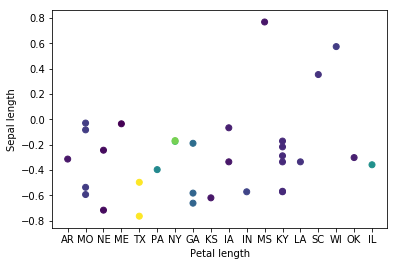

In [17]:
plt.scatter(features['state'].numpy(),
            features['dem_margin'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");